process_image ./aces/ace_of_hearts.png
process_image ./aces/ace_of_spades2.png
process_image ./aces/ace_of_spades.png
process_image ./aces/ace_of_diamonds.png


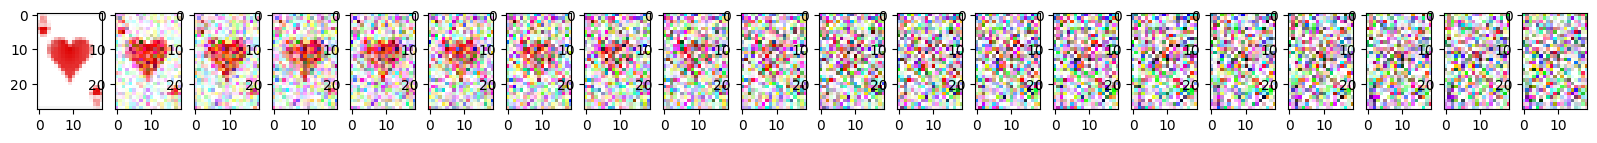

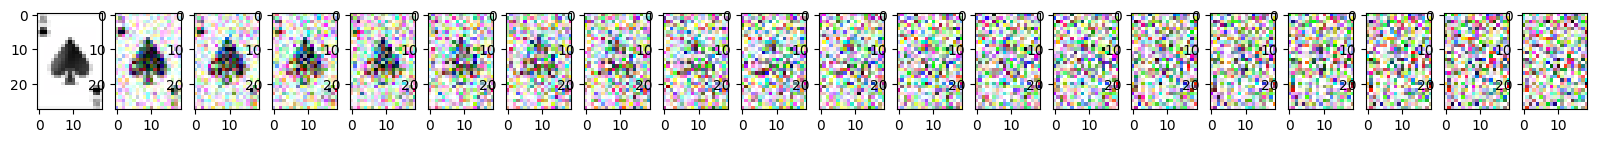

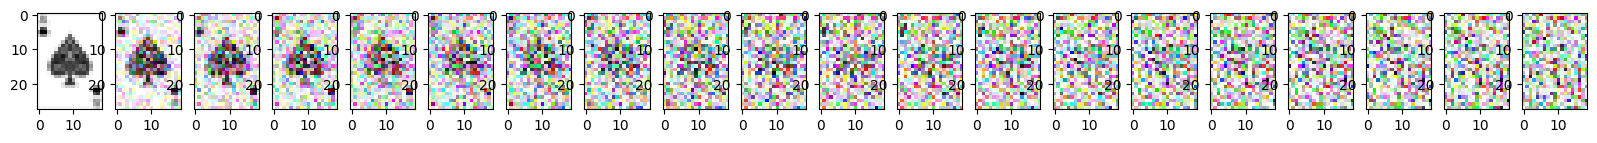

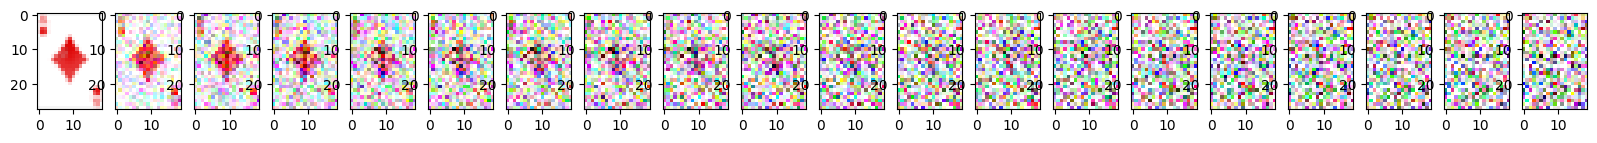

In [153]:
# Resize images using python 
import os 
from PIL import Image, ImageFilter
from multiprocessing import Pool
import numpy as np
import random
import matplotlib.pyplot as plt 
%matplotlib inline 

def process_image(imgpath, target_size, target_path):
    print ("process_image", imgpath)
    img = Image.open(imgpath)
    new_image = img.resize(target_size)
    new_image.save(target_path, 'png', quality=100)

def resize(folder_path, target_size, target_folder="./temp/"):
    for item in os.listdir(folder_path):
        folder_path = folder_path if folder_path[-1] == '/' else folder_path+"/"
        src_path = folder_path + item
        if os.path.isfile(src_path) and src_path[-4:] == ".png":
            process_image(src_path, target_size, target_folder+item)

resize("./aces/", (19,28))

def add_noise_to_images(folder_path):
    folder_path = folder_path if folder_path[-1] == '/' else folder_path+"/"
    iters = 20
    for item in os.listdir(folder_path):
        images = []
        src_path = folder_path + item
        img = np.array(Image.open(src_path))

        for noise in range(0, iters):
            images.append(img)
            gn = np.random.normal(loc=0, scale=50, size=img.shape)
            img = np.clip(img + gn, 0, 255).astype(np.uint8)
        
        plt.figure(figsize=(20,15))
        columns = iters
        for i, image in enumerate(images):
            plt.subplot(len(images) // columns + 1, columns, i + 1)
            plt.imshow(image)

add_noise_to_images('./temp/')
